['np', 'DET1', 'DET1E']
89.9615
16832.3582789
63.6146760862
0.707132229744
1.0


<IPython.core.display.Javascript object>


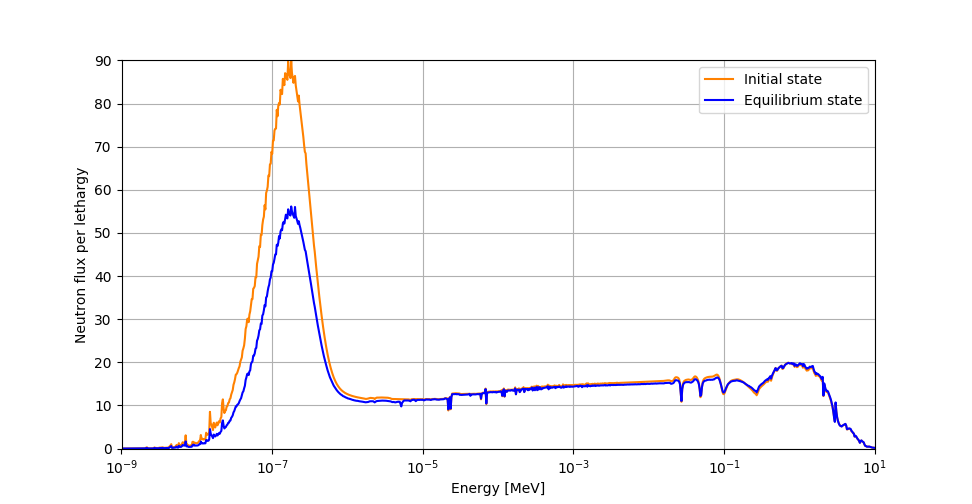

In [5]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import scipy
import matplotlib.pyplot
from pyne import serpent
from pyne import nucname

det0 = serpent.parse_det('../neutronics_paper/revision_1/core_det0_lethargy.m')
#det0 = serpent.parse_det('../neutronics_paper/check_ratio/core_det0.m')

#det10 = serpent.parse_det('../axial_reflector/core_det0.m')
det10 = serpent.parse_det('/home/andrei2/Desktop/git/msr-neutronics/RobertsonMSBR/neutronics_paper/reproc/eoc/core_det0.m')
energy_grid = det0['DET1E']
spectrum_grid = det0['DET1']
spectrum_grid2 = det10['DET1']
energy = energy_grid[:,2]
flux_spectrum = spectrum_grid[:,10]
print list(det0.keys())
print np.amax(spectrum_grid[:,10])
print np.sum(spectrum_grid[:,10])
print np.trapz(spectrum_grid[:,10],energy)
y = spectrum_grid[:,10]/np.trapz(spectrum_grid[:,10],energy)

#print energy
#print flux_spectrum
csv = np.genfromtxt ('park_spectra_2.csv', delimiter=",")
energy_p = csv[:,0]
spectrum_p = csv[:,1]
print np.trapz(spectrum_grid[:,10]/np.amax(spectrum_grid[:,10]),energy)
print np.trapz((np.trapz(y,energy)/np.trapz(spectrum_p,energy_p))*spectrum_p,energy_p)
# Initialize figure
fig_1 = matplotlib.pyplot.figure(1)
ax = fig_1.add_subplot(111)
ax.grid(True)
ax.set_ylim(0,90)
ax.set_xlim(1e-9,10)
ax.semilogx(energy, spectrum_grid[:,10], '-', label='Initial state', color='#ff8100')
ax.semilogx(energy, spectrum_grid2[:,10], '-', label='Equilibrium state', color='blue')
#ax.semilogx(energy_p, (np.trapz(y,energy)/np.trapz(spectrum_p,energy_p))*0.95*spectrum_p, '-', label='MCNP6 (Park et al. 2015 [4])')
ax.legend(loc=0)
ax.set_ylabel('Neutron flux per lethargy')
ax.set_xlabel('Energy [MeV]')
#ax.set_title(plot_title)
fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/publications/2017-msbr-geo/figures/figure_3_1.png',bbox_inches='tight')